In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
dtypes={'pop_id':'string','TIC':'string','gaiadr3_source_id':'string','epic_id':'string'}

In [4]:
df=pd.read_csv('gaiadatawithnearby.csv',dtype=dtypes)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_52240/788746263.py:1: DtypeWarning: Columns (7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gaiadatawithnearby.csv',dtype=dtypes)


In [5]:
df.drop(columns='ourgaiaids_oid', inplace=True)

In [6]:
milliarcsecs=df.parallax.values

In [7]:
arcsecs=milliarcsecs/1000

In [8]:
parsecs=1/arcsecs

In [9]:
df['distance']=parsecs

In [10]:
distancemod=-5*np.log10(parsecs)+5

In [11]:
df['g_absmag']=df['phot_g_mean_mag']+distancemod
df['bp_absmag']=df['phot_bp_mean_mag']+distancemod
df['rp_absmag']=df['phot_rp_mean_mag']+distancemod

In [12]:
df['abs_g_rp']=df['g_absmag']-df['rp_absmag']
df['abs_bp_rp']=df['bp_absmag']-df['rp_absmag']
df['abs_bp_g']=df['bp_absmag']-df['g_absmag']

In [13]:
conditions=[np.logical_not(pd.isna(df['gaiadr3_source_id'])),np.logical_not(np.isnan(df['GaiaEDR3'])),(np.logical_and(pd.isna(df['gaiadr3_source_id']), np.isnan(df['GaiaEDR3'])))]
values=["our table","nearby table","neither"]
df['source_table']=np.select(conditions,values)

In [14]:
df['source_table'].unique()

array(['nearby table', 'our table'], dtype=object)

In [15]:
df['source_table'].value_counts() #checking that both tables appear and no neither table and that numbers are right
#missing only the two from our table with no gaia id

source_table
nearby table    331264
our table          206
Name: count, dtype: int64

In [16]:
df[df.source_table=='our table']

,pop_id,TIC,gaiadr3_source_id,epic_id,per,per2,group,age_Myr,disco_paper,author,year,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,nearbyids_oid,GaiaEDR3,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g,source_table
1540,108,89463560,5314298588812179328,<NA>,0.392917,0.323333,Argus,45.0,Bouma_2024,Bouma,2024.0,1636148068921376768,Gaia DR3 5314298588812179328,5314298588812179328,142723245,2016.0,127.078663,0.024021,-59.598329,0.022613,8.046018,0.024323,330.801330,42.493660,-28.848830,0.031945,31.200257,0.029298,0.018281,0.079642,-0.147766,-0.112760,0.205586,-0.106102,-0.174286,-0.016556,-0.137589,0.036458,283,0,282,1,6.920251,494.45825,0.162284,7.088299,31,False,1.242654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,22,0.044709,54,15,0,0.015094,145.638150,1,0,1.306666,0.212878,0.081604,0.091285,0.166864,-56.605812,10.387552,56.181366,0.551559,False,438,22907.657050,21.964890,1042.92150,14.787415,46,3421.770948,20.470640,167.155060,16.502914,49,30648.693645,62.537285,490.08673,13.531865,1.487296,0.0,0.0,0.0,0.0,0.0,2.971049,1.715499,1.255550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,274.774836,-12.035882,174.879509,-72.161739,False,False,0,True,True,False,False,False,False,True,False,1.160294e-13,5.796348e-13,0.998613,Na

In [17]:
ourtableunclean=df[df.source_table=='our table']

In [18]:
ourtableunclean[ourtableunclean.pop_id==8]

,pop_id,TIC,gaiadr3_source_id,epic_id,per,per2,group,age_Myr,disco_paper,author,year,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,nearbyids_oid,GaiaEDR3,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g,source_table


In [19]:
df['g_erroverflux']=df.phot_g_mean_flux_error/df.phot_g_mean_flux
df['bp_erroverflux']=df.phot_bp_mean_flux_error/df.phot_bp_mean_flux
df['rp_erroverflux']=df.phot_rp_mean_flux_error/df.phot_rp_mean_flux

In [20]:
#filter out shitty flux measurements
dffilt=df[df.g_erroverflux<0.1]
dffilt=dffilt[df.bp_erroverflux<0.1]
dffilt=dffilt[df.rp_erroverflux<0.1]

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_52240/2976336728.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dffilt=dffilt[df.bp_erroverflux<0.1]
/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_52240/2976336728.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dffilt=dffilt[df.rp_erroverflux<0.1]


In [21]:
#and shitty parallax measurements
dffilt=dffilt[(dffilt.parallax_error/dffilt.parallax)<0.1]

In [22]:
dffilt['source_table'].value_counts() #dropped 7 of ours and about 45k of the others

source_table
nearby table    288546
our table          199
Name: count, dtype: int64

In [23]:
ourtable=dffilt[dffilt.source_table=='our table']
nearbytable=dffilt[dffilt.source_table=='nearby table']

In [24]:
writedf=pd.concat([ourtableunclean, nearbytable], ignore_index=True)

In [25]:
writedf['source_table'].value_counts()

source_table
nearby table    288546
our table          206
Name: count, dtype: int64

In [26]:
writedf.to_csv('cleanedgaiadata.csv',index=False)

In [27]:
ptcolor='deeppink' #just for fun for now but can change default color easily here for all graphs

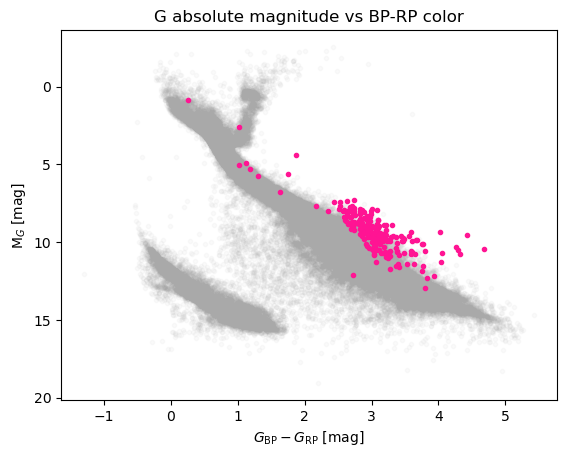

In [28]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_bp_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.show()

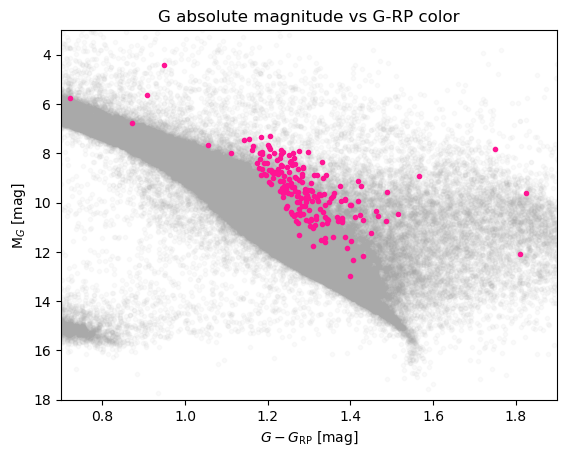

In [29]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

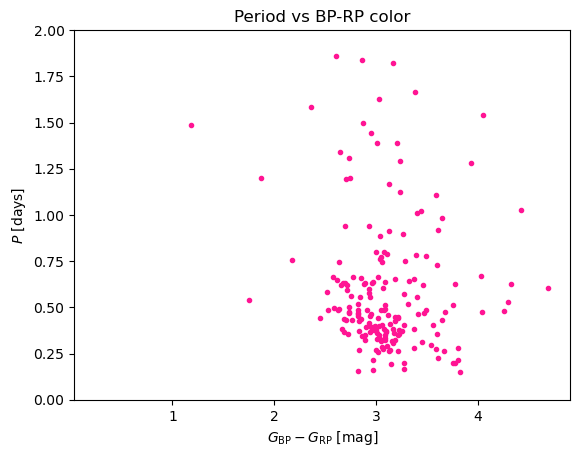

In [30]:
plt.scatter(ourtable.abs_bp_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs BP-RP color')
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

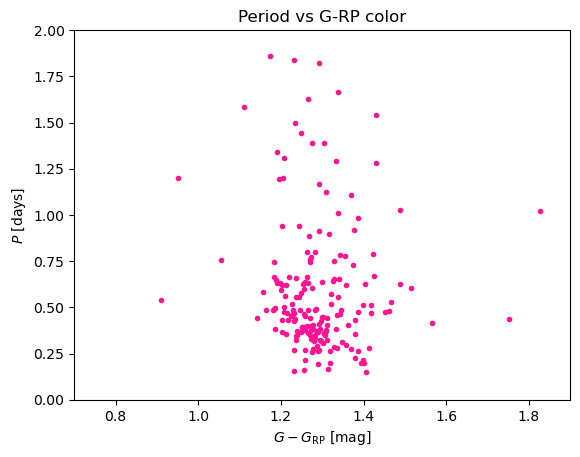

In [31]:
plt.scatter(ourtable.abs_g_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('Period vs G-RP color')
plt.xlim(0.7,1.9)
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

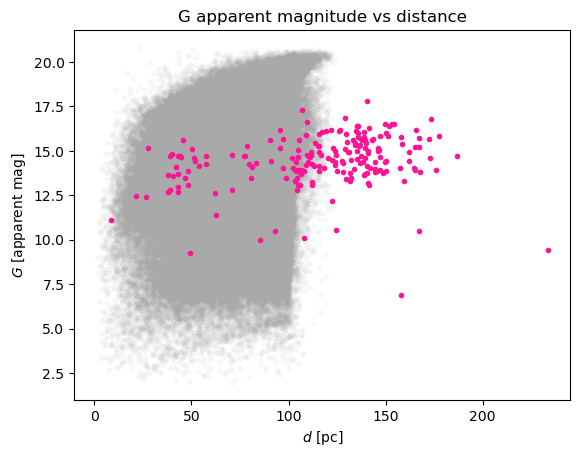

In [32]:
plt.scatter(nearbytable.distance,nearbytable.phot_g_mean_mag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.distance,ourtable.phot_g_mean_mag,marker='.',color=ptcolor)
plt.ylabel(r'$G$ [apparent mag]') 
plt.xlabel(r'$d$ [pc]')
plt.title('G apparent magnitude vs distance')
plt.show()

In [33]:
#adding log color scale abilities
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

In [34]:
conditions=[ourtable['disco_paper']=='Rebull_2016',
            ourtable['disco_paper']=='Stauffer_2017',
            ourtable['disco_paper']=='Stauffer_2018',
            ourtable['disco_paper']=='Rebull_2018',
            ourtable['disco_paper']=='Zhan_2019',
            ourtable['disco_paper']=='Rebull_2020',
            #ourtable['disco_paper']=='Koen_2020', - don't discover anything
            ourtable['disco_paper']=='Stauffer_2021',
            #ourtable['disco_paper']=='Koen_2021',
            #ourtable['disco_paper']=='Guenther_2022',
            ourtable['disco_paper']=='Rebull_2022',
            #ourtable['disco_paper']=='Koen_2022',
            ourtable['disco_paper']=='Popinchalk_2023',
            ourtable['disco_paper']=='Bouma_2024',
            ourtable['disco_paper']=='Popinchalk_2024']
outcomes=['#00007f', #rebull 1
          '#996300', #stauffer 1
          '#ffa500', #stauffer 2
          '#0000cc', #rebull 2
          '#00ff00', #zhan 1
          '#4c4cff', #rebull 3
          '#ffc966', #stauffer 3
          '#b2b2ff', #rebull 4
          '#b20e66', #popinchalk 1
          '#00ced1', #bouma 1
          '#ff5ab3'] #popinchalk 2
ourtable['color']=np.select(conditions,outcomes)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_52240/1236764780.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ourtable['color']=np.select(conditions,outcomes)


In [35]:
#first filter out period above 3 for our table
ourtablefilt=ourtable[ourtable['per']<=3]

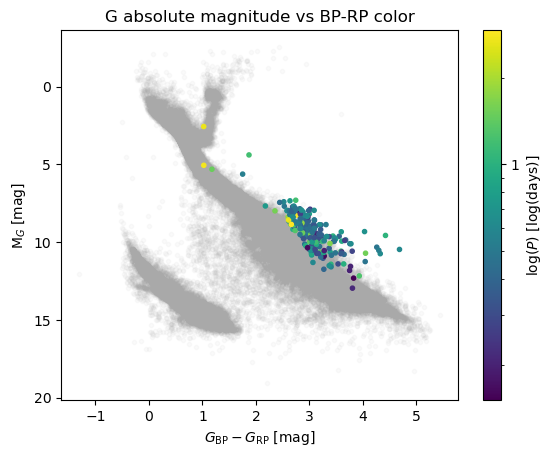

In [36]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_bp_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

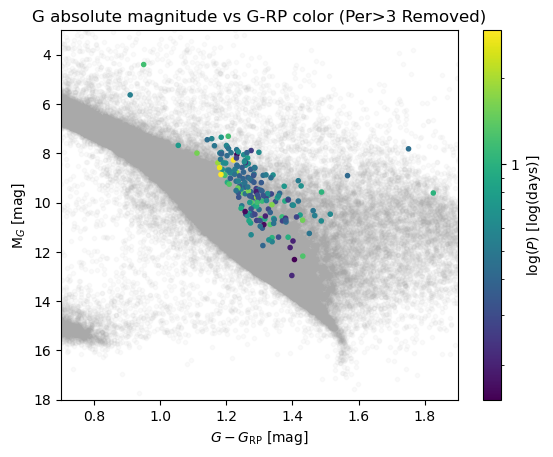

In [37]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_g_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color (Per>3 Removed)')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.savefig('CMDwithperiods.png')
plt.show()

In [38]:
#okay now repeat CMDs with RUWE color coding
conditions=[ourtable.ruwe<1.4,True]
category=['ruwe<1.4','ruwe>=1.4']
ourtable['ruwecat']=np.select(conditions,category)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_52240/3622421201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ourtable['ruwecat']=np.select(conditions,category)


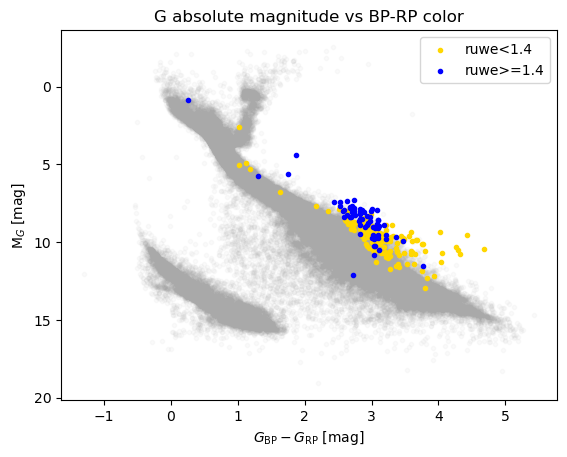

In [39]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
#blue dots are unresolved binaries so makes sense that they are brighter typically
#eventually improve way of showing dots so the blue ones aren't covering the gold
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.legend()
plt.show()

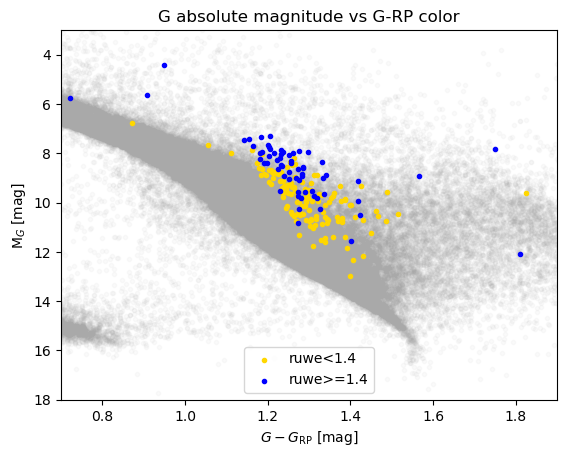

In [40]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

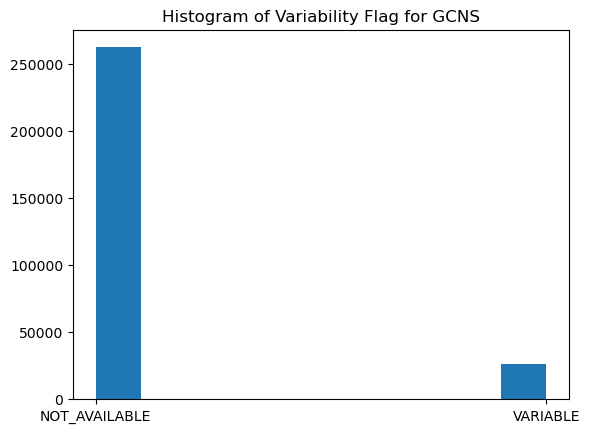

In [41]:
plt.hist(nearbytable['phot_variable_flag'])
plt.title('Histogram of Variability Flag for GCNS')
plt.show()

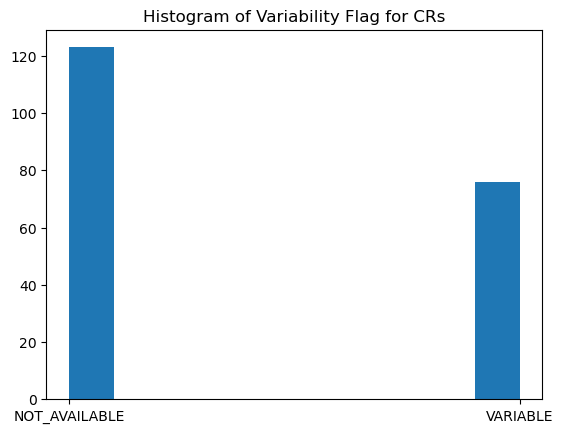

In [42]:
plt.hist(ourtable['phot_variable_flag'])
plt.title('Histogram of Variability Flag for CRs')
plt.show()

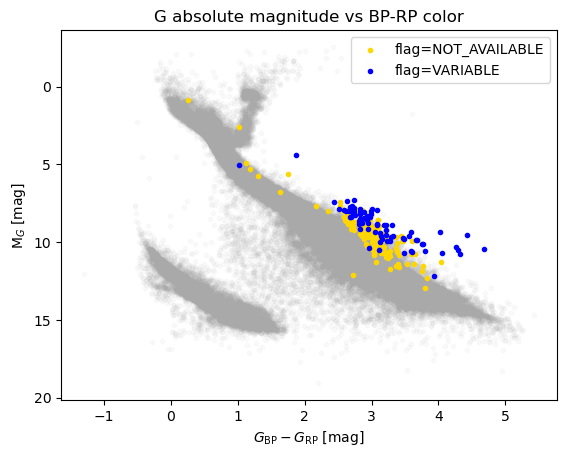

In [43]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].abs_bp_rp,ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].g_absmag,marker='.',color='gold',label='flag=NOT_AVAILABLE')
plt.scatter(ourtable[ourtable.phot_variable_flag=='VARIABLE'].abs_bp_rp,ourtable[ourtable.phot_variable_flag=='VARIABLE'].g_absmag,marker='.',color='blue',label='flag=VARIABLE')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.legend()
plt.show()

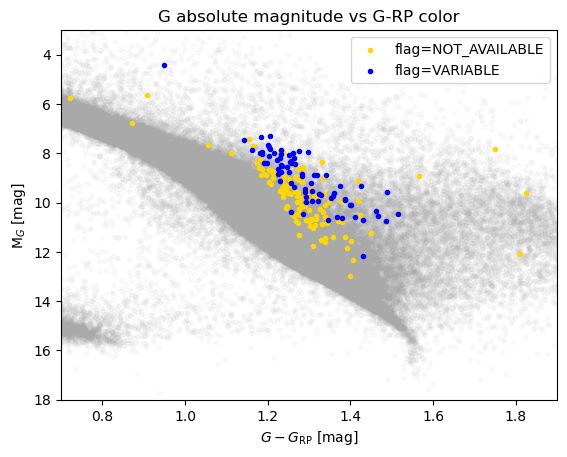

In [44]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].abs_g_rp,ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].g_absmag,marker='.',color='gold',label='flag=NOT_AVAILABLE')
plt.scatter(ourtable[ourtable.phot_variable_flag=='VARIABLE'].abs_g_rp,ourtable[ourtable.phot_variable_flag=='VARIABLE'].g_absmag,marker='.',color='blue',label='flag=VARIABLE')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

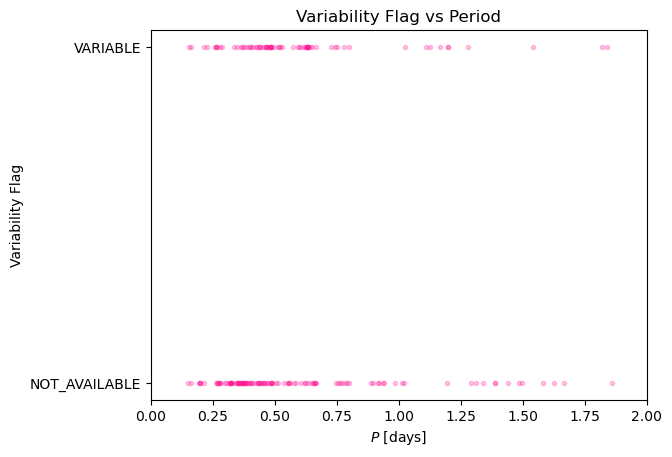

In [45]:
plt.scatter(ourtable.per,ourtable.phot_variable_flag,marker='.',color=ptcolor,alpha=0.25)
plt.ylabel(r'Variability Flag')
plt.xlabel(r'$P$ [days]')
plt.title('Variability Flag vs Period')
plt.xlim(0,2) #cutting out some outliers for better visibility
plt.show()

In [46]:
papers=['Rebull_2016',
            'Stauffer_2017',
            'Stauffer_2018',
            'Rebull_2018',
            'Zhan_2019',
            'Rebull_2020',
            #ourtable['disco_paper']=='Koen_2020', - don't discover anything
            'Stauffer_2021',
            #ourtable['disco_paper']=='Koen_2021',
            #ourtable['disco_paper']=='Guenther_2022',
            'Rebull_2022',
            #ourtable['disco_paper']=='Koen_2022',
            'Popinchalk_2023',
            'Bouma_2024',
            'Popinchalk_2024']

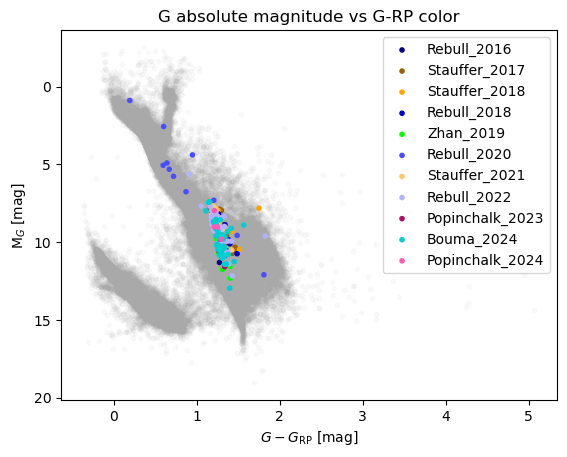

In [47]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
for paper in papers:
    curtable=ourtable[ourtable.disco_paper==paper]
    plt.scatter(curtable.abs_g_rp,curtable.g_absmag,marker='.',label=paper,color=curtable.color)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

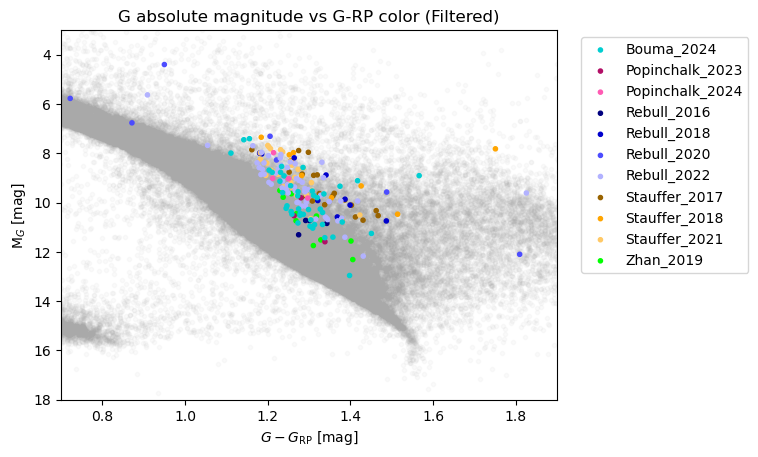

In [48]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
for paper in papers:
    curtable=ourtable[ourtable.disco_paper==paper]
    plt.scatter(curtable.abs_g_rp,curtable.g_absmag,marker='.',label=paper,color=curtable.color)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.title('G absolute magnitude vs G-RP color (Filtered)')
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
sorted_items = sorted(unique.items(), key=lambda item: item[0])
sorted_labels, sorted_handles = zip(*sorted_items)
plt.legend(sorted_handles, sorted_labels, loc='upper right',bbox_to_anchor=(1.4,1))
plt.savefig('CMDwithpapers.png')
plt.show()

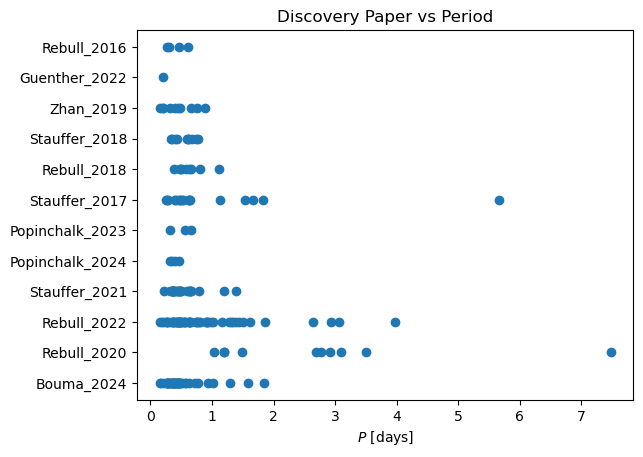

In [49]:
plt.scatter(ourtable.per,ourtable.disco_paper)
plt.xlabel(r'$P$ [days]')
plt.title('Discovery Paper vs Period')
plt.show()

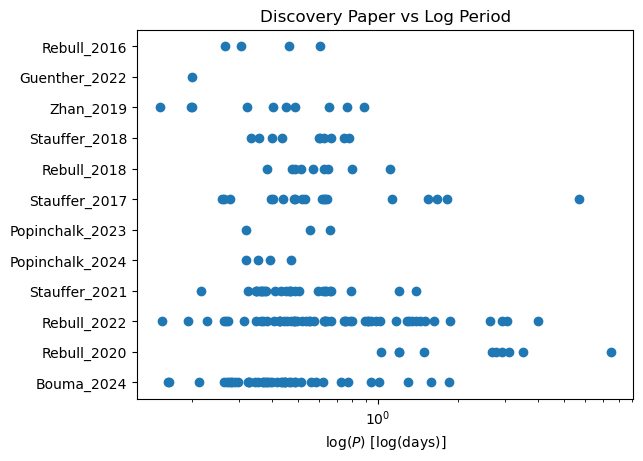

In [50]:
plt.scatter(ourtable.per,ourtable.disco_paper)
plt.xscale('log')
plt.xlabel(r'log($P$) [log(days)]')
plt.title('Discovery Paper vs Log Period')
plt.show()

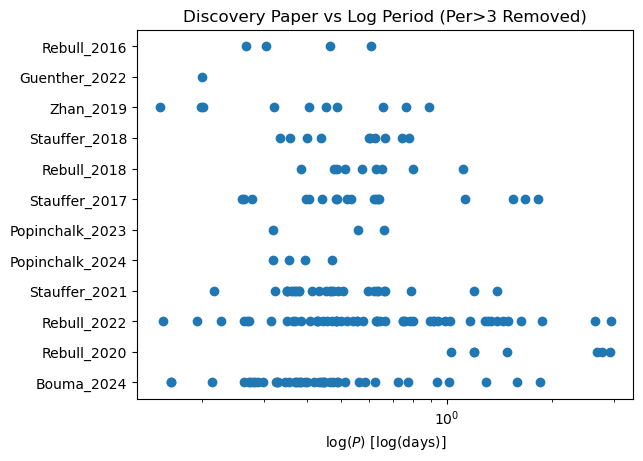

In [51]:
plt.scatter(ourtablefilt.per,ourtablefilt.disco_paper)
plt.xscale('log')
plt.xlabel(r'log($P$) [log(days)]')
plt.title('Discovery Paper vs Log Period (Per>3 Removed)')
plt.show()